In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as stats

# Reseting to the default seaborn theme
sb.set_theme()

In [2]:
out_dir = "out"

In [3]:
datasets = ['amzms', 'ml100k', 'mlls']
datasets.sort()

algorithms = ['opf', 'opf_snn', 'kmeans', 'user_knn', 'dbscan']
col_name = {"opf": "OPF", 
            "opf_snn": "OPF$_{SNN}$", 
            "kmeans": "$k$-Means", 
            "user_knn": "User-KNN", 
            "dbscan": "DBSCAN"}
dist_name = {"cosine": "Cosine", 
             "euclidean": "Euclidean", 
             "jaccard": "Jaccard", 
             "pearson": "Pearson", 
             "squared_euclidean": "Squared Euclidean"}

In [4]:
def csv_to_df(f_path: str, alg: str = ''):
    
    df = pd.read_csv(f_path, header=0)
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    df[['algorithm']] = df[['algorithm']].applymap(lambda x: col_name.get(x))
    df[['distance']] = df[['distance']].applymap(lambda x: dist_name.get(x))
    
    if alg in algorithms:
        df = df[df['algorithm'] == col_name.get(alg)]
        return df
    
    return df

In [9]:
df = csv_to_df(f"../out/{datasets[2]}_results.csv", alg='dbscan')
df

,algorithm,n_neighbors,n_neighbors_best,n_clusters,distance,similarity,mae,rmse,ndcg@1,ndcg@5,ndcg@10,precision@1,precision@5,precision@10,recall@1,recall@5,recall@10
1480,DBSCAN,60,0,2,Squared Euclidean,pearson,0.530610,0.637393,0.655738,0.686439,0.689061,0.622951,0.728750,0.805569,0.377049,0.378750,0.416587
1481,DBSCAN,60,0,2,Squared Euclidean,pearson,0.531677,0.638054,0.540984,0.556565,0.537538,0.590164,0.711789,0.709278,0.295082,0.278862,0.242159
1482,DBSCAN,60,0,2,Squared Euclidean,pearson,0.568549,0.687966,0.622951,0.707999,0.732961,0.606557,0.717521,0.770663,0.442623,0.429487,0.409977
1483,DBSCAN,60,0,2,Squared Euclidean,pearson,0.604719,0.744842,0.590164,0.585594,0.603504,0.540984,0.640196,0.657407,0.327869,0.328922,0.347817
1484,DBSCAN,60,0,2,Squared Euclidean,pearson,0.517584,0.631013,0.557377,0.577058,0.663848,0.524590,0.772083,0.787037,0.311475,0.397083,0.324691
1485,DBSCAN,60,0,2,Squared Euclidean,pearson,0.498089,0.611042,0.540984,0.636545,0.698728,0.540984,0.798062,0.777976,0.245902,0.444186,0.434144
1486,DBSCAN,60,0,2,Squared Euclidean,pearson,0.522346,0.642106,0.459016,0.606863,0.657148,0.688525,0.762121,0.789130,0.426230,0.347475,0.386042
1487,DBSCAN,60,0,2,Squared Euclidean,pearson,0.538113,0.662253,0.573770,0.610660,0.585433,0.573770,0.728862,0.778938,0.327869,0.392683,0.430754
1488,DBSCAN,60,0,2,Squared Euclidean,pearson,0.565788,0.680842,0.622951,0.589746,0.664335,0.590164,0.753750,0.734610,0.360656,0.404583,0.447947
1489,DBSCAN,60,0,2,Squared Euclidean,pearson,0.610843,0.746223,0.622951,0.636354,0.674217,0.557377,0.728378,0.730506,0.245902,0.369369,0.384540


In [10]:
df.query("algorithm ==  'User-KNN'")

,algorithm,n_neighbors,n_neighbors_best,n_clusters,distance,similarity,mae,rmse,ndcg@1,ndcg@5,ndcg@10,precision@1,precision@5,precision@10,recall@1,recall@5,recall@10
1340,User-KNN,10,NaN,NaN,None,pearson,0.997537,1.187770,0.265625,0.308048,0.376244,0.421875,0.523529,0.600000,0.218750,0.337745,0.525154
1341,User-KNN,20,NaN,NaN,None,pearson,0.962758,1.143071,0.312500,0.374986,0.414304,0.453125,0.558824,0.605556,0.250000,0.369118,0.530710
1342,User-KNN,30,NaN,NaN,None,pearson,0.962155,1.143016,0.312500,0.381279,0.419108,0.453125,0.564706,0.605556,0.250000,0.375000,0.530710
1343,User-KNN,40,NaN,NaN,None,pearson,0.960644,1.142257,0.375000,0.405426,0.449379,0.468750,0.558824,0.600000,0.265625,0.369118,0.525154
1344,User-KNN,50,NaN,NaN,None,pearson,0.960304,1.141834,0.375000,0.416015,0.466715,0.468750,0.558824,0.605556,0.265625,0.369118,0.530710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,User-KNN,30,NaN,NaN,None,pearson,0.962155,1.143016,0.312500,0.381279,0.419108,0.453125,0.564706,0.605556,0.250000,0.375000,0.530710
1476,User-KNN,40,NaN,NaN,None,pearson,0.960644,1.142257,0.375000,0.405426,0.449379,0.468750,0.558824,0.600000,0.265625,0.369118,0.525154
1477,User-KNN,50,NaN,NaN,None,pearson,0.960304,1.141834,0.375000,0.416015,0.466715,0.468750,0.558824,0.605556,0.265625,0.369118,0.530710
1478,User-KNN,60,NaN,NaN,None,pearson,0.960304,1.141834,0.375000,0.416015,0.466715,0.468750,0.558824,0.605556,0.265625,0.369118,0.530710


In [5]:
ds = datasets[0]
df = csv_to_df(f"../out/{ds}_results.csv")
a = col_name.get('opf_snn')
df.query(f"algorithm == '{a}' and n_neighbors == 30 and distance == 'Jaccard'")[['n_neighbors', 'n_clusters', 'mae', 'rmse']]

,n_neighbors,n_clusters,mae,rmse
752,30,53.0,0.999977,1.178437
782,30,49.0,1.003598,1.158771
812,30,58.0,0.996340,1.152987
842,30,55.0,0.981554,1.133195
872,30,57.0,0.983726,1.145414
902,30,59.0,1.024956,1.188195
932,30,60.0,0.937260,1.063157
962,30,60.0,0.977569,1.139323
992,30,57.0,0.936455,1.122900
1022,30,50.0,1.078859,1.210028


### Plot evaluation measure x distance function

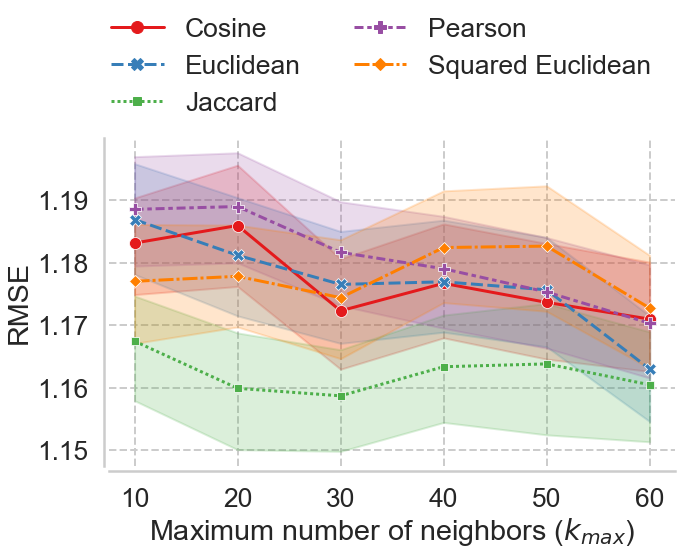

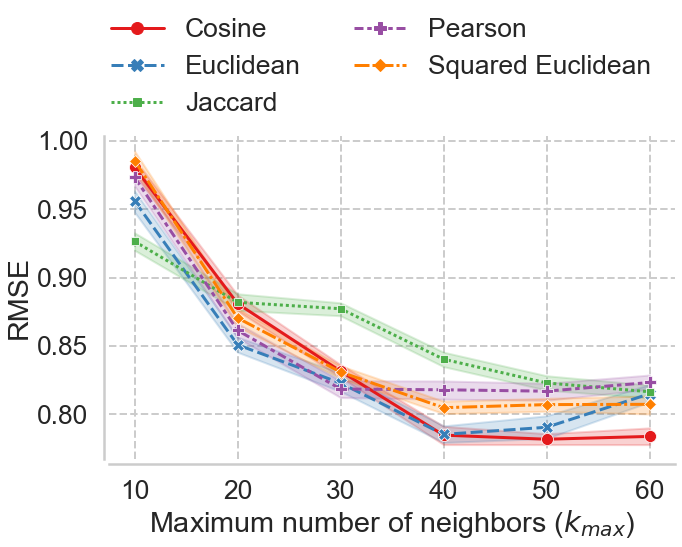

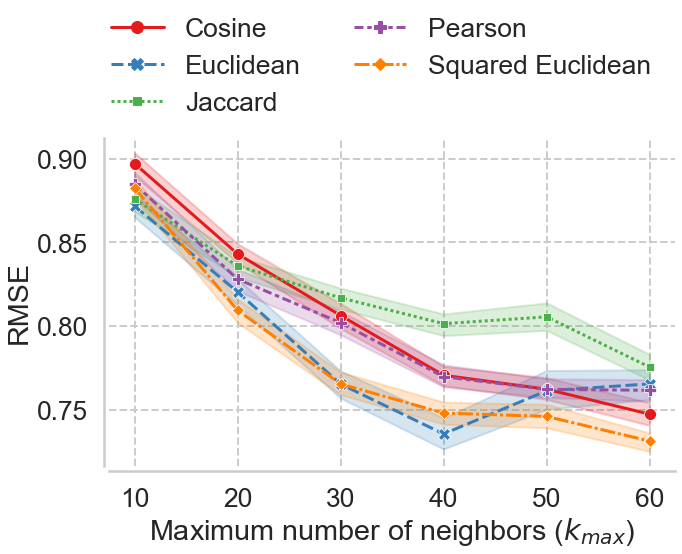

In [28]:
sb.set_context("poster", font_scale=1.2)
sb.set_style(style="whitegrid", rc={"context": "poster", "font_scale": 3, "grid.linestyle": "--"})

metric = 'rmse'
plt_name = f"opf_snn_dist_{metric}"
    
for ds in datasets:
    
    df = pd.read_csv(f"../out/{ds}_results.csv", header=0)
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    df[['algorithm']] = df[['algorithm']].applymap(lambda x: col_name.get(x))
    df[['distance']] = df[['distance']].applymap(lambda x: dist_name.get(x))
    df_snn = df[df['algorithm'] == col_name.get("opf_snn")]

    # g = sb.relplot(kind="line", data=df_snn, x="n_neighbors", y=metric, hue="distance",
    #         palette="Set1", height=6, aspect=2.1, legend='brief', facet_kws={'legend_out': False})
    
    g = sb.relplot(kind="line", data=df_snn, x="n_neighbors", y=metric, hue="distance", style="distance", markers=True,
            palette="Set1", height=6, aspect=1.6, legend='brief', facet_kws={'legend_out': False}, errorbar=('ci', 50))
    
    g.set(xlabel="Maximum number of neighbors ($k_{max}$)", ylabel=metric.upper())
    
    sb.despine(offset=5, trim=False)
    
    # plt.title(ds.upper())
    plt.tight_layout(pad=.4)
    plt.legend(frameon=False, ncol=2, bbox_to_anchor=(0.48, 1.4), loc='upper center', borderaxespad=0)
    # plt.savefig(f"./figs/{ds}_opf_snn_dist_{metric}.pdf", format='pdf', bbox_inches='tight')
    plt.show()

In [42]:
proposed_mean = df[df['algorithm'] == 'opf_snn'].groupby(by='k_max').mean()
baseline_mean = df[df['algorithm'] == 'opf'].groupby(by='k_max').mean()

In [43]:
proposed_mean

,Unnamed: 0,timestamp,random_state,k_best,n_clusters,db_index,silhouette_score,homogeneity,completeness,v_measure,adjusted_rand_index,adjusted_mutual_info
k_max,,,,,,,,,,,,
5,1.0,1.679860e+09,55486.55,4.55,376.45,NaN,NaN,0.965735,0.966102,0.965918,0.960408,0.963990
10,1.0,1.679860e+09,55486.55,6.95,256.20,NaN,NaN,0.961846,0.962268,0.962057,0.955215,0.959909
15,1.0,1.679860e+09,55486.55,9.80,179.60,NaN,NaN,0.958810,0.959248,0.959029,0.949990,0.956710
20,1.0,1.679860e+09,55486.55,12.60,139.85,NaN,NaN,0.946391,0.947074,0.946732,0.933814,0.943716
25,1.0,1.679860e+09,55486.55,15.40,112.45,NaN,NaN,0.932137,0.932927,0.932531,0.915860,0.928712
30,1.0,1.679860e+09,55486.55,16.40,105.60,NaN,NaN,0.935402,0.936307,0.935854,0.920766,0.932223
35,1.0,1.679860e+09,55486.55,19.25,85.05,NaN,NaN,0.923843,0.925026,0.924433,0.902154,0.920152
40,1.0,1.679860e+09,55486.55,21.35,75.80,NaN,NaN,0.917454,0.919536,0.918491,0.894857,0.913867
45,1.0,1.679860e+09,55486.55,22.70,69.15,NaN,NaN,0.912133,0.914625,0.913375,0.887050,0.908459


In [44]:
baseline_mean

,Unnamed: 0,timestamp,random_state,k_best,n_clusters,db_index,silhouette_score,homogeneity,completeness,v_measure,adjusted_rand_index,adjusted_mutual_info
k_max,,,,,,,,,,,,
5,0.0,1.679860e+09,55486.55,5.00,249.35,NaN,NaN,0.961513,0.962080,0.961796,0.954720,0.959633
10,0.0,1.679860e+09,55486.55,10.00,82.20,NaN,NaN,0.943491,0.944761,0.944124,0.927358,0.940958
15,0.0,1.679860e+09,55486.55,15.00,42.80,NaN,NaN,0.910658,0.915895,0.913261,0.876891,0.908323
20,0.0,1.679860e+09,55486.55,20.00,26.25,NaN,NaN,0.895060,0.903952,0.899476,0.849465,0.893731
25,0.0,1.679860e+09,55486.55,24.40,18.90,NaN,NaN,0.881316,0.895500,0.888318,0.828970,0.881953
30,0.0,1.679860e+09,55486.55,27.60,16.70,NaN,NaN,0.869383,0.889483,0.879279,0.813659,0.872431
35,0.0,1.679860e+09,55486.55,32.15,14.70,NaN,NaN,0.856776,0.880632,0.868481,0.798022,0.861088
40,0.0,1.679860e+09,55486.55,37.45,13.25,NaN,NaN,0.840158,0.873236,0.856291,0.777335,0.848514
45,0.0,1.679860e+09,55486.55,40.50,12.10,NaN,NaN,0.829497,0.872068,0.850190,0.767088,0.842328


<AxesSubplot:xlabel='k_best', ylabel='n_clusters'>

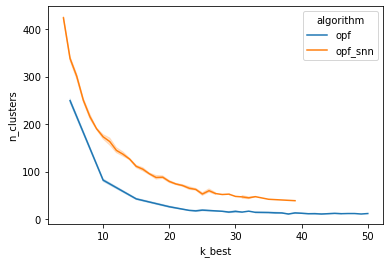

In [46]:
sb.lineplot(data=df, x='k_best', y='n_clusters', hue='algorithm')

<AxesSubplot:xlabel='k_max', ylabel='k_best'>

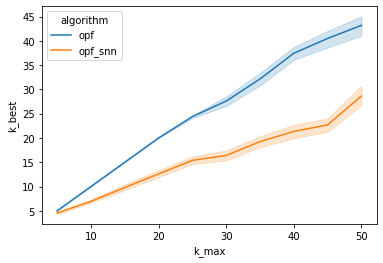

In [31]:
sb.lineplot(data=df, x='k_max', y='k_best', hue='algorithm')

<AxesSubplot:xlabel='k_max', ylabel='adjusted_rand_index'>

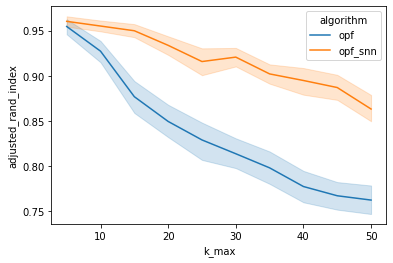

In [22]:
sb.lineplot(data=df, x='k_max', y='adjusted_rand_index', hue='algorithm')

<AxesSubplot:xlabel='k_max', ylabel='adjusted_mutual_info'>

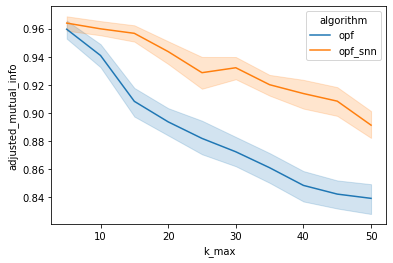

In [23]:
sb.lineplot(data=df, x='k_max', y='adjusted_mutual_info', hue='algorithm')

In [22]:
g.set

In [11]:
new_col_name = {"opf": "OPF", "opf_snn": "OPF$_{SNN}$"}

plt_fname = "v_measure_barplot"
for ds in datasets:
    
    for f in os.scandir('/'.join(['..', out_dir])):

        if ds in f.name:
            print(ds)
            df = csv_to_df(ds, alg='')
            # df.drop(['Unnamed: 0'], axis=1, inplace=True)
            df[['algorithm']] = df[['algorithm']].applymap(lambda x: new_col_name.get(x))
            # break
        # break

bcw
ccrf
digits
frogs
google_reviews
olivetti_faces


In [29]:
def read_df_from_csv(ds_name: str, alg: str = ''):
    
    col_name = {"opf": "OPF", 
                "opf_snn": "OPF$_{SNN}$", 
                "user_knn": "User-KNN", 
                "kmeans": "$k$-Means",
                "dbscan": "DBSCAN"}
    
    dist_name = {"cosine": "Cosine", "euclidean": "Euclidean", 
                 "jaccard": "Jaccard", "pearson": "Pearson", 
                 "squared_euclidean": "Squared Euclidean"}
    
    for f in os.scandir('/'.join(['..', out_dir])):

        if '.csv' in f.name and 'old' not in f.name and ds in f.name:

            # print("Reading '", ds_name, "' dataset...")
            _df = pd.read_csv(f.path, header=0)
            _df.drop(['Unnamed: 0'], axis=1, inplace=True)
            _df[['algorithm']] = _df[['algorithm']].applymap(lambda x: col_name.get(x))
            _df[['distance']] = _df[['distance']].applymap(lambda x: dist_name.get(x))
        
    if alg in algorithms:
        _df = _df[_df['algorithm'] == col_name.get(alg)]
        return _df
        
    return _df

In [7]:
df.query("n_neighbors == 30 and distance == 'Squared Euclidean'").groupby(by="algorithm").mean()

,n_neighbors,n_neighbors_best,n_clusters,mae,rmse,ndcg@1,ndcg@5,ndcg@10,precision@1,precision@5,precision@10,recall@1,recall@5,recall@10
algorithm,,,,,,,,,,,,,,
OPF,30.0,27.95,14.75,0.951324,1.117184,0.617969,0.662881,0.647017,0.408594,0.550073,0.585369,0.265625,0.405108,0.388421
OPF$_{SNN}$,30.0,25.05,69.65,1.022621,1.174371,0.353906,0.361676,0.311064,0.488281,0.603218,0.611714,0.224219,0.320209,0.259922


## Recommendation phase evaluation
#### Generaring statistics regarding the results from sparse data

In [30]:
def create_new_entry(cols='alg'):

    if cols == 'metric':
        return {v: "" for v in metric_map.values()}
    
    return {v: "" for v in algo_map.values()}

In [31]:
out_dir = "out"

algo_map = {"user_knn": "User-KNN", 
            "kmeans": "$k$-Means", 
            "opf": "OPF", 
            "opf_snn": "OPF$_{SNN}$",
            "dbscan": "DBSCAN"}

metric_map = {"mae": "MAE", "rmse": "RMSE", 
              "ndcg@1": "NDCG@1", "ndcg@5": "NDCG@5", "ndcg@10": "NDCG@10", 
              "precision@1": "PRECISION@1", "precision@5": "PRECISION@5", "precision@10": "PRECISION@10",
              "recall@1": "RECALL@1", "recall@5": "RECALL@5", "recall@10": "RECALL@10"}
dataset_map = {"amzms": "AMZ-MS", "ml100k": "ML-100K", "mlls": "ML-LS"}

In [32]:
approaches = list(algo_map.values())
measures = list(metric_map.values())
kmax = [30, 50, 60]
distances = ['Jaccard', 'Cosine', 'Squared Euclidean']
alg_prm = {datasets[i]: [kmax[i], distances[i]] for i in range(0, len(datasets))}

tb_index = pd.MultiIndex.from_product([list(dataset_map.values()), approaches], names=["Dataset", "Approach"])
tb = pd.DataFrame(index=tb_index, columns=list(metric_map.values()))

for ds in datasets:

    df = read_df_from_csv(ds)
        
    for alg in approaches:
        
        # Create a empty dataframe row
        row = create_new_entry(cols='metric')
    
        search_query = f"n_neighbors == {alg_prm.get(ds)[0]} and distance == '{alg_prm.get(ds)[1]}'"
        
        query = df.query(search_query).groupby('algorithm')[list(metric_map.keys())]
        
        for m_key, m_value in metric_map.items():
        
            mean = query.mean().loc[alg][m_key]
            std = query.std().loc[alg][m_key]
            row[m_value] = f"{mean:.4f} \pm {std:.4f}"
        
        tb.loc[dataset_map.get(ds), alg] = row

print("Done...")

Done...


In [33]:
# Rating prediction average results
df_rp = tb[measures[:2]]
# df_rp

In [34]:
# Ranking average results
df_rank = tb[measures[2:5]]
# df_rank

In [35]:
# Decision support average results
df_ds = tb[measures[5:]]
# df_ds

In [36]:
# Average results considering all evaluation measures and datasets
tb

MAE               RMSE             NDCG@1  \
Dataset Approach                                                               
AMZ-MS  User-KNN     1.0200 \pm 0.0649  1.1673 \pm 0.0715  0.3016 \pm 0.0479   
        $k$-Means    1.0069 \pm 0.0543  1.1604 \pm 0.0624  0.3922 \pm 0.0464   
        OPF          1.0047 \pm 0.0542  1.1618 \pm 0.0608  0.4641 \pm 0.0520   
        OPF$_{SNN}$  1.0012 \pm 0.0501  1.1587 \pm 0.0567  0.4430 \pm 0.0583   
        DBSCAN       1.0149 \pm 0.0516  1.1748 \pm 0.0610  0.4570 \pm 0.0722   
ML-100K User-KNN     0.8459 \pm 0.0366  1.0053 \pm 0.0392  0.3277 \pm 0.0567   
        $k$-Means    0.7185 \pm 0.0315  0.8605 \pm 0.0383  0.4319 \pm 0.0652   
        OPF          0.8469 \pm 0.0293  1.0047 \pm 0.0342  0.2707 \pm 0.0568   
        OPF$_{SNN}$  0.6509 \pm 0.0224  0.7818 \pm 0.0274  0.4739 \pm 0.0649   
        DBSCAN       0.5827 \pm 0.0251  0.6960 \pm 0.0296  0.5766 \pm 0.0623   
ML-LS   User-KNN     0.7498 \pm 0.0367  0.9075 \pm 0.0446  0.3426 \pm 0.0959   
        $k$-Means    0.6403 \pm 0.0453  0.7793 \pm 0.0481  0.4770 \pm 0.0685   
        OPF          0.5482 \pm 0.0340  0.6675 \pm 0.0419  0.5516 \pm 0.0595   
        OPF$_{SNN}$  0.6016 \pm 0.0354  0.7313 \pm 0.0388  0.4861 \pm 0.0912   
        DBSCAN       0.5409 \pm 0.0325  0.6582 \pm 0.0393  0.5566 \pm 0.0644   

                                NDCG@5            NDCG@10        PRECISION@1  \
Dataset Approach                                                               
AMZ-MS  User-KNN     0.3506 \pm 0.0542  0.3088 \pm 0.0693  0.4898 \pm 0.0537   
        $k$-Means    0.4291 \pm 0.0435  0.4015 \pm 0.0698  0.4586 \pm 0.0487   
        OPF          0.4945 \pm 0.0481  0.4607 \pm 0.0727  0.4453 \pm 0.0624   
        OPF$_{SNN}$  0.5019 \pm 0.0575  0.4935 \pm 0.0694  0.4367 \pm 0.0440   
        DBSCAN       0.4861 \pm 0.0581  0.4392 \pm 0.0452  0.4367 \pm 0.0636   
ML-100K User-KNN     0.4531 \pm 0.0490  0.5054 \pm 0.0537  0.4723 \pm 0.0593   
        $k$-Means    0.5473 \pm 0.0397  0.5762 \pm 0.0537  0.5266 \pm 0.0464   
        OPF          0.3455 \pm 0.0407  0.3626 \pm 0.0445  0.5149 \pm 0.0596   
        OPF$_{SNN}$  0.5821 \pm 0.0479  0.6188 \pm 0.0537  0.5606 \pm 0.0520   
        DBSCAN       0.6833 \pm 0.0473  0.7190 \pm 0.0596  0.6426 \pm 0.0556   
ML-LS   User-KNN     0.4198 \pm 0.0497  0.4439 \pm 0.0671  0.4385 \pm 0.0534   
        $k$-Means    0.5389 \pm 0.0641  0.5558 \pm 0.0613  0.5148 \pm 0.0533   
        OPF          0.6144 \pm 0.0545  0.6284 \pm 0.0560  0.5705 \pm 0.0591   
        OPF$_{SNN}$  0.5422 \pm 0.0657  0.5484 \pm 0.0677  0.5164 \pm 0.0531   
        DBSCAN       0.6215 \pm 0.0508  0.6368 \pm 0.0540  0.5754 \pm 0.0408   

                           PRECISION@5       PRECISION@10           RECALL@1  \
Dataset Approach                                                               
AMZ-MS  User-KNN     0.6014 \pm 0.0600  0.6030 \pm 0.0782  0.2273 \pm 0.0493   
        $k$-Means    0.5742 \pm 0.0805  0.5937 \pm 0.1018  0.2242 \pm 0.0305   
        OPF          0.5616 \pm 0.0730  0.5827 \pm 0.0903  0.2359 \pm 0.0456   
        OPF$_{SNN}$  0.5518 \pm 0.0735  0.5686 \pm 0.0958  0.2375 \pm 0.0353   
        DBSCAN       0.5631 \pm 0.0661  0.5790 \pm 0.0730  0.2336 \pm 0.0460   
ML-100K User-KNN     0.5989 \pm 0.0520  0.6797 \pm 0.0457  0.2223 \pm 0.0455   
        $k$-Means    0.6654 \pm 0.0420  0.7274 \pm 0.0442  0.2995 \pm 0.0380   
        OPF          0.6244 \pm 0.0621  0.6920 \pm 0.0659  0.2170 \pm 0.0481   
        OPF$_{SNN}$  0.7052 \pm 0.0473  0.7677 \pm 0.0375  0.3176 \pm 0.0409   
        DBSCAN       0.8093 \pm 0.0371  0.8772 \pm 0.0319  0.3420 \pm 0.0610   
ML-LS   User-KNN     0.5450 \pm 0.0569  0.5578 \pm 0.0737  0.2451 \pm 0.0533   
        $k$-Means    0.6484 \pm 0.0730  0.6487 \pm 0.0814  0.3139 \pm 0.0395   
        OPF          0.7278 \pm 0.0594  0.7393 \pm 0.0740  0.3410 \pm 0.0559   
        OPF$_{SNN}$  0.6399 \pm 0.0620  0.6564 \pm 0.0670  0.3197 \pm 0.0591   
        DBSCAN       0.7304 \pm 0

In [40]:
def read_df_from_csv(ds_name: str, alg: str = ''):
    
    col_name = {"opf": "OPF", "opf_snn": "OPF$_{SNN}$", 
                "user_knn": "User-KNN", "kmeans": "$k$-Means",
                "dbscan": "DBSCAN"}
    dist_name = {"cosine": "Cosine", "euclidean": "Euclidean", 
                 "jaccard": "Jaccard", "pearson": "Pearson", 
                 "squared_euclidean": "Squared Euclidean"}
    
    for f in os.scandir('/'.join(['..', out_dir])):

        if '.csv' in f.name and 'old' not in f.name and ds in f.name:

            # print("Reading '", ds_name, "' dataset...")
            _df = pd.read_csv(f.path, header=0)
            _df.drop(['Unnamed: 0'], axis=1, inplace=True)
            _df[['algorithm']] = _df[['algorithm']].applymap(lambda x: col_name.get(x))
            _df[['distance']] = _df[['distance']].applymap(lambda x: dist_name.get(x))
        
    if alg in algorithms:
        _df = _df[_df['algorithm'] == col_name.get(alg)]
        return _df
    
    return _df

In [41]:
ds = 'amzms'
df = read_df_from_csv('amzms')
search_query = f"n_neighbors == {alg_prm.get(ds)[0]} and distance == '{alg_prm.get(ds)[1]}'"
df_algs = {key: df.query(f"{search_query} and algorithm == '{algo_map[key]}'") for key in algo_map.keys()}
alg_prm.get(ds)

[30, 'Jaccard']

In [16]:
key_to_metric = {value: key for key, value in metric_map.items()}
col_measures = list(key_to_metric.values())
np_algs = np.array(list(algo_map.keys()))

# Select the approach based on the best average result
# idx_best = np.argmin([df_algs[i]['mae'].mean() for i in np_algs])

# cg = df_algs[np_algs[idx_best]]['mae'].values
# test_groups = np.delete(np_algs, idx_best)
# idx_best, test_groups

In [23]:
metric = 'precision@10'
alpha = 0.05 # Significance level of the test
alt_hipothesis = 'greater' # Better result = Maximum result
zmethod = 'wilcox'

print("Eval. measure: ", metric.upper())

# Select the approach based on the best average result
if metric in ['mae', 'rmse']:
    print("Function: MIN")
    idx_best = np.argmin([df_algs[i][metric].mean() for i in np_algs])
else:
    print("Function: MAX")
    idx_best = np.argmax([df_algs[i][metric].mean() for i in np_algs])

alg_best = np_algs[idx_best]  

print("Best approach:", alg_best)

cg = df_algs[alg_best][metric].values
test_groups = np.delete(np_algs, idx_best)

for alg_test in test_groups:
    
    tg = df_algs[approach][metric].values
    
    stat, pvalue = stats.wilcoxon(cg, tg, zero_method=zmethod, alternative='two-sided')

    print(f"Stats: {stat}, p-value: {pvalue: .4f}")

    if pvalue > alpha: 
        print("There is no difference in the medians of A and B.")
        
        x = tb.loc[dataset_map.get(ds), algo_map.get(alg_best)][metric_map.get(metric)]
        
        if "$" not in x:
            print("$" + x + "$")
        
        x = tb.loc[dataset_map.get(ds), algo_map.get(alg_test)][metric_map.get(metric)]
        
        if "$" not in x:
            print("$" + x + "$")
        
    else:
        print("There is a difference between the medians of A and B.")
        
        # Better result = minimum result
        if metric in ['mae', 'rmse']:
            print("Alternative = 'less'")
            alt_hipothesis = 'less'
        else:
            print("Alternative = 'greater'")
        
        stat, pvalue = stats.wilcoxon(cg, tg, zero_method=zmethod, alternative=alt_hipothesis)
        
        if pvalue > alpha:
            
            # highlight the test group (tg) in bold
            print(approach, "is superior.")
            x = tb.loc[dataset_map.get(ds), algo_map.get(alg_test)][metric.upper()]
            
            if "mathbf" not in x:
                print("$\mathbf{" + x + "}$")
            
            x = tb.loc[dataset_map.get(ds), algo_map.get(alg_best)][metric.upper()]
            if "$" not in x:
                print("$" + x + "$")
        else:
            # highlight the control group (cg) in bold
            print(np_algs[idx_best], "is superior.")
            x = tb.loc[dataset_map.get(ds), algo_map.get(alg_best)][metric.upper()]
            
            if "mathbf" not in x:
                print("$\mathbf{" + x + "}$")
            
            x = tb.loc[dataset_map.get(ds), algo_map.get(alg_test)][metric.upper()]
            
            if "$" not in x:
                print("$" + x + "$")
               

Eval. measure:  PRECISION@10
Function: MAX
Best approach: user_knn
Stats: 89.0, p-value:  0.5706
There is no difference in the medians of A and B.
$0.6030 \pm 0.0782$
$0.5937 \pm 0.1018$
Stats: 89.0, p-value:  0.5706
There is no difference in the medians of A and B.
$0.6030 \pm 0.0782$
$0.5827 \pm 0.0903$
Stats: 89.0, p-value:  0.5706
There is no difference in the medians of A and B.
$0.6030 \pm 0.0782$
$0.5686 \pm 0.0958$


In [42]:
key_to_metric = {value: key for key, value in metric_map.items()}
col_measures = list(key_to_metric.values())
np_algs = np.array(list(algo_map.keys()))

# Select the approach based on the best average result
idx_best = np.argmin([df_algs[i]['mae'].mean() for i in np_algs])

cg = df_algs[np_algs[idx_best]]['mae'].values
test_groups = np.delete(np_algs, idx_best)
idx_best, test_groups

alpha = 0.05 # Significance level of the test
alt_hipothesis = 'greater' # Better result = Maximum result
zmethod = 'wilcox'

for ds in datasets:
   
    # Get the optimal parameters regarding dataset ds
    kmax = alg_prm.get(ds)[0]
    dist = alg_prm.get(ds)[1]
    
    print("\nDataset:", ds, "  kmax:", kmax, "  Distance:", dist)
    # print("Kmax: ", kmax)
    # print("Distance: ", dist)
    
    df = read_df_from_csv(ds)
    
    search_query = f"n_neighbors == {alg_prm.get(ds)[0]} and distance == '{alg_prm.get(ds)[1]}'"
    df_algs = {key: df.query(f"{search_query} and algorithm == '{algo_map[key]}'")[col_measures] 
               for key in algo_map.keys()}
    
    for metric, metric_key in metric_map.items():
        
        # Select the arg function (min or max) based on current eval metric
        if metric in ['mae', 'rmse']:
            idx_best = np.argmin([df_algs[i][metric].mean() for i in np_algs])
        else:
            idx_best = np.argmax([df_algs[i][metric].mean() for i in np_algs])
        
        alg_best = np_algs[idx_best]
        print("Best:", alg_best)
        
        # Sets the control group (i.e., the best average result)
        cg = df_algs[alg_best][metric].values
        
        test_groups = np.delete(np_algs, idx_best)

        for alg_test in test_groups:
            
            print("Test", alg_test, "against", alg_best, "...")
            
            tg = df_algs[alg_test][metric].values

            stat, pvalue = stats.wilcoxon(cg, tg, zero_method=zmethod, alternative='two-sided')

            # print(f"Stats: {stat}, p-value: {pvalue: .4f}")

            if pvalue > alpha: 
                # print("There is no difference in the medians of A and B.")
                
                # control group
                x = tb.loc[dataset_map.get(ds), algo_map.get(alg_best)][metric_key]
                
                if "$" not in x:
                    tb.loc[dataset_map.get(ds), algo_map.get(alg_best)][metric_key] = "$" + x + "$"
                
                # test group
                x = tb.loc[dataset_map.get(ds), algo_map.get(alg_test)][metric_key]
                
                if "$" not in x:
                    tb.loc[dataset_map.get(ds), algo_map.get(alg_test)][metric_key] = "$" + x + "$"
                
            else:
                # print("There is a difference between the medians of A and B.")

                # Better result = minimum result
                if metric in ['mae', 'rmse']:
                    # print("Alternative = 'less'")
                    alt_hipothesis = 'less'
                else:
                    # print("Alternative = 'greater'")
                    alt_hipothesis = 'greater'

                stat, pvalue = stats.wilcoxon(cg, tg, zero_method=zmethod, alternative=alt_hipothesis)

                if pvalue > alpha:
                    # Null Hipothesis is true: highlight the test group (tg) in bold
                    # print(alg, "is superior.")
                    
                    # test group
                    x = tb.loc[dataset_map.get(ds), algo_map.get(alg_test)][metric_key]
                    
                    if "mathbf" not in x:
                        if "$" in x: x = x[1:-1]
                        tb.loc[dataset_map.get(ds), algo_map.get(alg_test)][metric_key] = "$\mathbf{" + x + "}$"
                    
                    # control group
                    x = tb.loc[dataset_map.get(ds), algo_map.get(alg_best)][metric_key]
                    
                    if "$" not in x:
                        tb.loc[dataset_map.get(ds), algo_map.get(alg_best)][metric_key] = "$" + x + "$"
                        
                else:
                    # Alt. Hipothesis is true: highlight the control group (cg) in bold
                    # print(np_algs[idx_best], "is superior.")
                    
                    # control group
                    x = tb.loc[dataset_map.get(ds), algo_map.get(alg_best)][metric_key]
                    
                    if "mathbf" not in x:
                        if "$" in x: x = x[1:-1]
                        tb.loc[dataset_map.get(ds), algo_map.get(alg_best)][metric_key] = "$\mathbf{" + x + "}$"

                    # test group
                    x = tb.loc[dataset_map.get(ds), algo_map.get(alg_test)][metric_key]
                    
                    if "$" not in x:
                        tb.loc[dataset_map.get(ds), algo_map.get(alg_test)][metric_key] = "$" + x + "$"

print("Done...")

# Saving the dataframe as .csv (will be converted to latex table further) 
save_path = "/".join(["tables", "sparse", f"sparse_data_stats_22.06.2023.csv"])
tb.to_csv(save_path)

print("Results latex table saved in '", save_path)

Dataset: amzms   kmax: 30   Distance: Jaccard
Best: opf_snn
Test user_knn against opf_snn ...
Test kmeans against opf_snn ...
Test opf against opf_snn ...
Test dbscan against opf_snn ...
Best: opf_snn
Test user_knn against opf_snn ...
Test kmeans against opf_snn ...
Test opf against opf_snn ...
Test dbscan against opf_snn ...
Best: opf
Test user_knn against opf ...
Test kmeans against opf ...
Test opf_snn against opf ...
Test dbscan against opf ...
Best: opf_snn
Test user_knn against opf_snn ...
Test kmeans against opf_snn ...
Test opf against opf_snn ...
Test dbscan against opf_snn ...
Best: opf_snn
Test user_knn against opf_snn ...
Test kmeans against opf_snn ...
Test opf against opf_snn ...
Test dbscan against opf_snn ...
Best: user_knn
Test kmeans against user_knn ...
Test opf against user_knn ...
Test opf_snn against user_knn ...
Test dbscan against user_knn ...
Best: user_knn
Test kmeans against user_knn ...
Test opf against user_knn ...
Test opf_snn against user_knn ...
Test dbs

/home/guilherme/Programs/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/guilherme/Programs/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/guilherme/Programs/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Best: dbscan
Test user_knn against dbscan ...
Test kmeans against dbscan ...
Test opf against dbscan ...
Test opf_snn against dbscan ...
Best: dbscan
Test user_knn against dbscan ...
Test kmeans against dbscan ...
Test opf against dbscan ...
Test opf_snn against dbscan ...
Best: dbscan
Test user_knn against dbscan ...
Test kmeans against dbscan ...
Test opf against dbscan ...
Test opf_snn against dbscan ...
Best: dbscan
Test user_knn against dbscan ...
Test kmeans against dbscan ...
Test opf against dbscan ...
Test opf_snn against dbscan ...
Best: dbscan
Test user_knn against dbscan ...
Test kmeans against dbscan ...
Test opf against dbscan ...
Test opf_snn against dbscan ...
Best: dbscan
Test user_knn against dbscan ...
Test kmeans against dbscan ...
Test opf against dbscan ...
Test opf_snn against dbscan ...
Best: dbscan
Test user_knn against dbscan ...
Test kmeans against dbscan ...
Test opf against dbscan ...
Test opf_snn against dbscan ...
Best: dbscan
Test user_knn against dbscan

In [22]:
tb_rp = tb[['MAE', 'RMSE']]
tb_rp.T

Dataset                AMZ-MS                                            \
Approach             User-KNN            $k$-Means                  OPF   
MAE       $1.0200 \pm 0.0649$  $1.0069 \pm 0.0543$  $1.0047 \pm 0.0542$   
RMSE      $1.1673 \pm 0.0715$  $1.1604 \pm 0.0624$  $1.1618 \pm 0.0608$   

Dataset                                    ML-100K                       \
Approach          OPF$_{SNN}$             User-KNN            $k$-Means   
MAE       $1.0012 \pm 0.0501$  $0.8459 \pm 0.0366$  $0.7185 \pm 0.0315$   
RMSE      $1.1587 \pm 0.0567$  $1.0053 \pm 0.0392$  $0.8605 \pm 0.0383$   

Dataset                                                      \
Approach                  OPF                   OPF$_{SNN}$   
MAE       $0.8469 \pm 0.0293$  $\mathbf{0.6509 \pm 0.0224}$   
RMSE      $1.0047 \pm 0.0342$  $\mathbf{0.7818 \pm 0.0274}$   

Dataset                 ML-LS                       \
Approach             User-KNN            $k$-Means   
MAE       $0.7498 \pm 0.0367$  $0.6403 \pm 0.0453$   
RMSE      $0.9075 \pm 0.0446$  $0.7793 \pm 0.0481$   

Dataset                                                      
Approach                           OPF          OPF$_{SNN}$  
MAE       $\mathbf{0.5482 \pm 0.0340}$  $0.6016 \pm 0.0354$  
RMSE      $\mathbf{0.6675 \pm 0.0419}$  $0.7313 \pm 0.0388$

In [107]:
x = np.random.normal(loc=50, scale=2, size=20)
y = np.random.normal(loc=50 + 2.4, scale=2, size=20)

In [108]:
(x.mean(), x.std()), (y.mean(), y.std())

((49.85052243432371, 2.105197601932631),
 (53.138950547366576, 1.8685268754145428))

In [109]:
np.median(x), np.median(y)

(49.12865574116866, 53.04418888679612)

In [110]:
alpha = 0.05 # Significance level of the test
st, pvalue = stats.wilcoxon(x, y, alternative='two-sided')

print(f"Stats: {st}, p-value: {pvalue: .4f}")

if pvalue > alpha: print("There is no difference in the medians of A and B.")
else:
    print("There is a difference between the medians of A and B.")

Stats: 22.0, p-value:  0.0010
There is a difference between the medians of A and B.


In [173]:
st, pvalue = stats.wilcoxon(x, y, alternative='less')

print(f"Stats: {st}, p-value: {pvalue: .4f}")

if pvalue > .05: print("The difference between the medians is NOT negative (A > B).")
else:
    print("The difference between the medians is negative (A < B).")

Stats: 30.0, p-value:  0.0018
The difference between the medians is negative (A < B).


In [174]:
st, pvalue = stats.wilcoxon(x, y, alternative='greater')

print(f"Stats: {st}, p-value: {pvalue: .4f}")

if pvalue > .05: print("The difference between the medians is NOT positive (A < B).")
else:
    print("The difference between the medians is positive (A > B).")

Stats: 30.0, p-value:  0.9984
The difference between the medians is NOT positive (A < B).
